In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sea


In [110]:
dataset = pd.read_csv('dataset/onlinefoods.csv')

In [111]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [112]:
print(dataset.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [113]:
print(dataset.columns)

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')


In [114]:
dataset['Educational Qualifications'].dtype

dtype('O')

In [115]:
dataset_encoded = pd.get_dummies(dataset)

In [116]:
print(dataset_encoded.head())

   Age  Family size  latitude  longitude  Pin code  Gender_Female  \
0   20            4   12.9766    77.5993    560001           True   
1   24            3   12.9770    77.5773    560009           True   
2   22            3   12.9551    77.6593    560017          False   
3   22            6   12.9473    77.5616    560019           True   
4   22            4   12.9850    77.5533    560010          False   

   Gender_Male  Marital Status_Married  Marital Status_Prefer not to say  \
0        False                   False                             False   
1        False                   False                             False   
2         True                   False                             False   
3        False                   False                             False   
4         True                   False                             False   

   Marital Status_Single  ...  Educational Qualifications_Ph.D  \
0                   True  ...                            False

In [117]:
X = dataset [['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income']]
y = dataset ['Output']

In [118]:
categorical_columns = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income']

In [119]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [122]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'Marital Status',
                                                   'Occupation',
                                                   'Monthly Income'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [123]:
predictions = pipeline.predict(X_test)

In [124]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.8333333333333334


In [125]:
#tambah data untuk prediksi
new_data = pd.DataFrame({
    'Age': [30],
    'Gender': ['Male'],  
    'Marital Status': ['Married'], 
    'Occupation': ['Student'],  
    'Monthly Income': ['No Income'],  
    'Family size': [4],
    'latitude': [0.0],
    'longitude': [0.0],
    'Pin code': [123456]
})

In [126]:
predicted_stock = pipeline.predict(new_data)

In [127]:
print('Prediksi ketersediaan stok:', predicted_stock)

Prediksi ketersediaan stok: ['Yes']


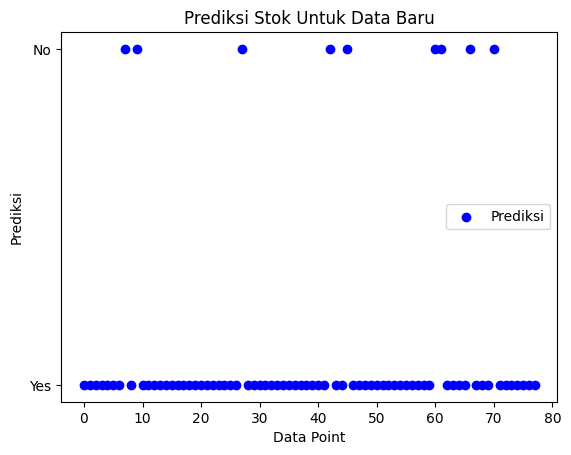

In [128]:
plt.scatter(range(len(predictions)), predictions, color='blue', label='Prediksi')

plt.xlabel('Data Point')
plt.ylabel('Prediksi')

plt.title('Prediksi Stok Untuk Data Baru')
plt.legend()

plt.show()

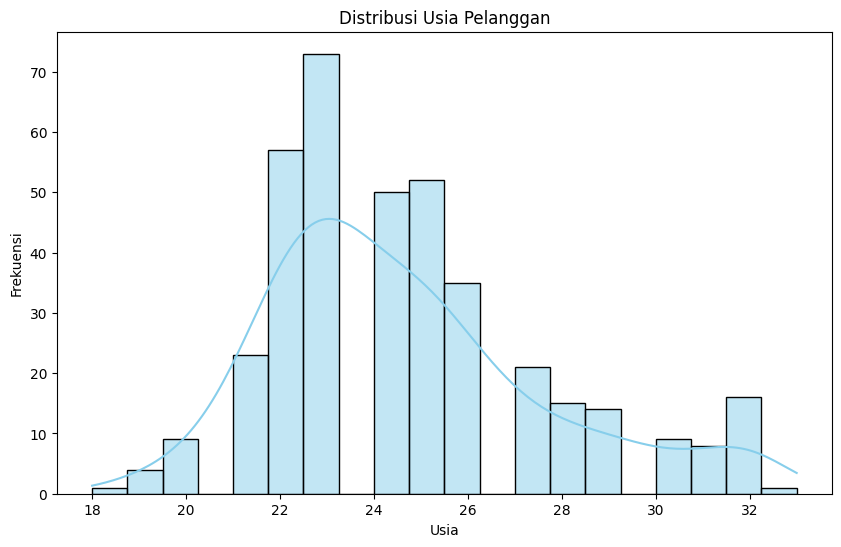

In [129]:
plt.figure(figsize=(10, 6))
sea.histplot(data=dataset, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\musta\AppData\Local\Temp\ipykernel_60300\718540924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(data=dataset, x='Gender', palette='Set2')


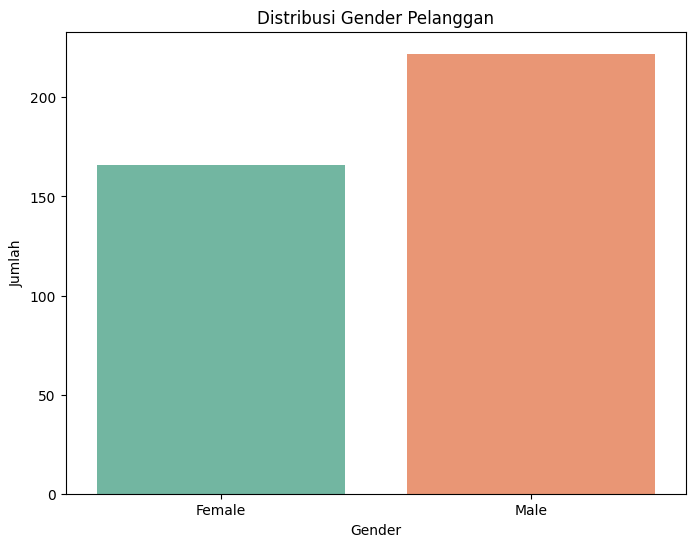

In [130]:
plt.figure(figsize=(8, 6))
sea.countplot(data=dataset, x='Gender', palette='Set2')
plt.title('Distribusi Gender Pelanggan')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

C:\Users\musta\AppData\Local\Temp\ipykernel_60300\2098623400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(data=dataset, x='Marital Status', palette='Set3')


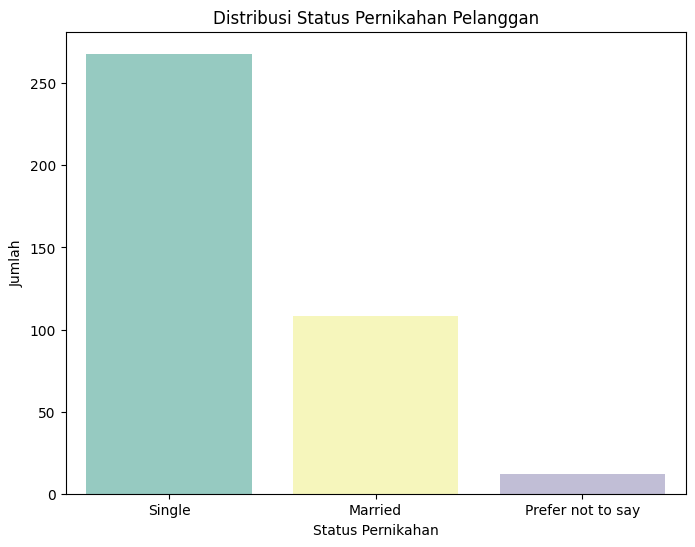

In [131]:
plt.figure(figsize=(8, 6))
sea.countplot(data=dataset, x='Marital Status', palette='Set3')
plt.title('Distribusi Status Pernikahan Pelanggan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah')
plt.show()

C:\Users\musta\AppData\Local\Temp\ipykernel_60300\3347570188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(data=dataset, x='Family size', palette='Pastel1')


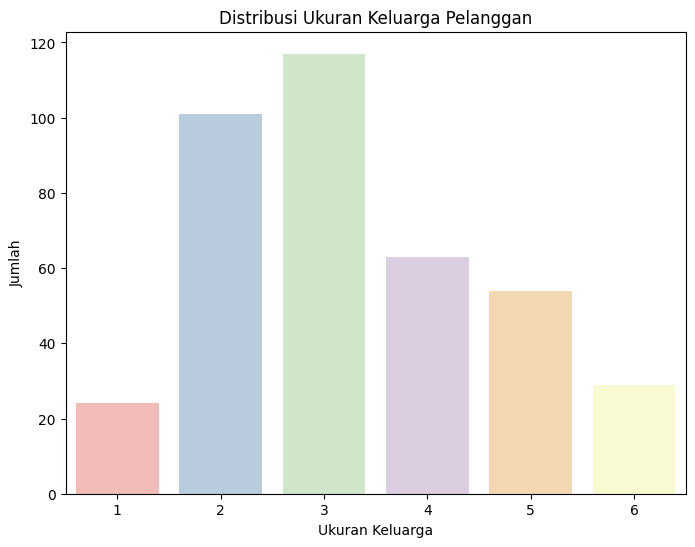

In [132]:
plt.figure(figsize=(8, 6))
sea.countplot(data=dataset, x='Family size', palette='Pastel1')
plt.title('Distribusi Ukuran Keluarga Pelanggan')
plt.xlabel('Ukuran Keluarga')
plt.ylabel('Jumlah')
plt.show()